In [ ]:
!pip install numpy networkx seaborn matplotlib

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as approx

/Users/ykharkov/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Running Julia MPS simulator

To run MPS Julia simulator run from terminal (from the root directory of the project):
```
$ julia mps_runner.jl --program-path=ahs_program.json --interaction-radius=<interaction_r>
```

where <interaction_r> is the interaction radius in CI units, e.g. 7e-6.

The Braket AHS program alone does not contain information about the interaction radius [bloackade radius].

You may supply additional command line arguments to `mps_runner.jl`. To learn more about them, run `julia mps_braket.jl --help`.

In [71]:
# !julia mps_braket.jl --program-path=ahs_program.json --interaction-radius=<interaction_r>

## Look at experiment results: square lattice with NNN interactions [pruned Union Jack lattice]

In [22]:
# square lattice: 5 x 5

dir_name = f"../experiment_braket"
psi_samples = pd.read_csv(f"{dir_name}/mps_samples.csv")
coords = pd.read_csv(f"{dir_name}/atom_coordinates.csv")
filling = pd.read_csv(f"{dir_name}/filling.csv")
density = pd.read_csv(f"{dir_name}/mps_density.csv")

### Visualize a few samples [red - Ry, green - Ground]

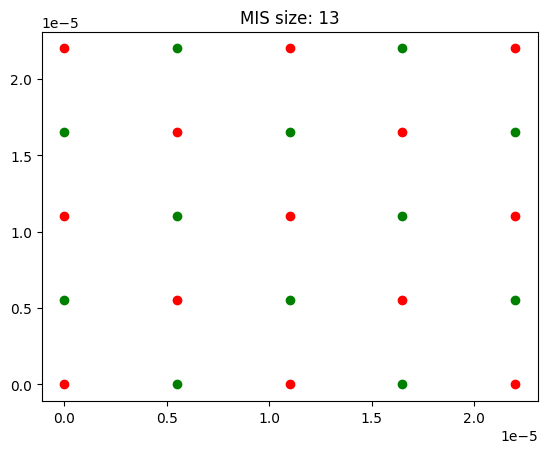

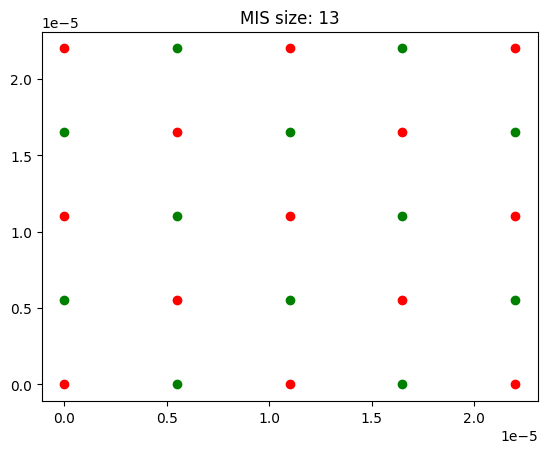

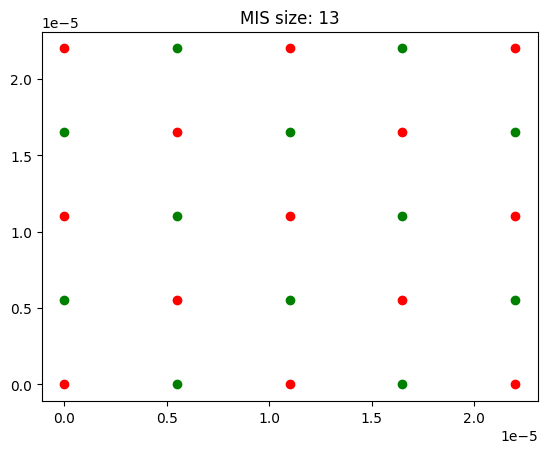

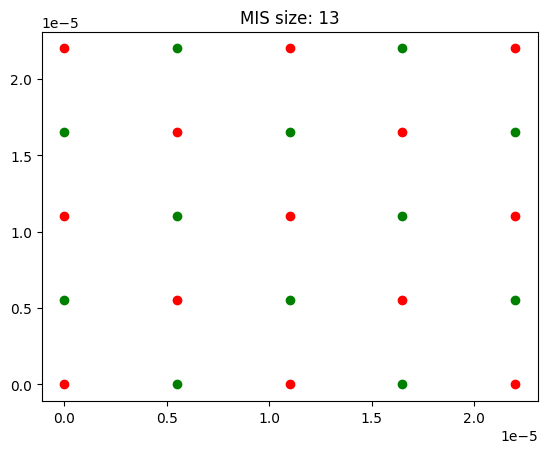

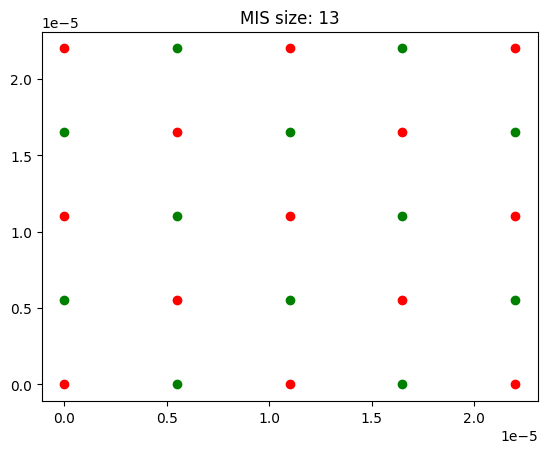

In [23]:
for sample in psi_samples.values[:5]:
    plt.plot(coords.T.values[sample == 0, 0], coords.T.values[sample == 0, 1], 'o', c='g')
    plt.plot(coords.T.values[sample == 1, 0], coords.T.values[sample == 1, 1], 'o', c='r')
    plt.title(f"MIS size: {sum(sample)}")
    plt.show()

#### Visualize average densities

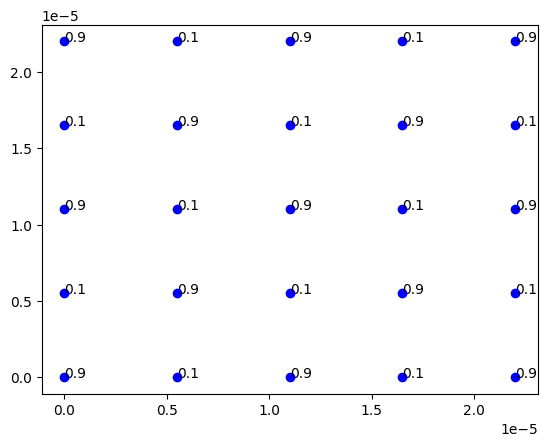

In [24]:
atom_coords = coords.T.values
plt.plot(atom_coords[:, 0], atom_coords[:, 1], 'o', c='b')

for i, txt in enumerate(density.values[-1]):
    plt.annotate(round(txt, 1), (atom_coords[i, 0], atom_coords[i, 1]))

### Distribution of MIS sizes [without postselection]

Text(0.5, 1.0, 'Num Rydberg atoms [MIS size, no postselect]')

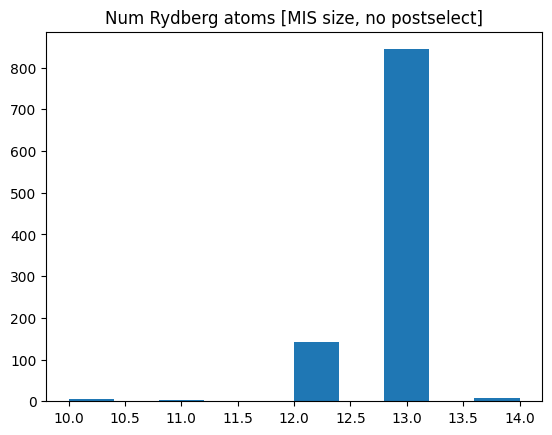

In [25]:
plt.hist(psi_samples.values.sum(axis=1));
plt.title("Num Rydberg atoms [MIS size, no postselect]")

### Compute MIS classically

In [28]:
rows = 5  # Number of rows
cols = 5  # Number of columns

# Create a grid graph for the square lattice
G = nx.grid_2d_graph(rows, cols)
G = nx.convert_node_labels_to_integers(G)

# Prune graph
nodes_to_delete = np.where(filling.values == 0)[1]
G.remove_nodes_from(nodes_to_delete)

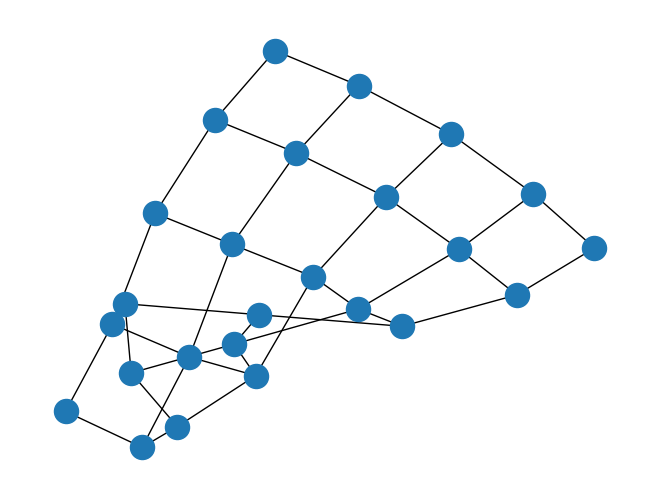

In [29]:
nx.draw(G)

In [30]:
I = approx.maximum_independent_set(G)

In [31]:
print(f"MIS size: {len(I)}")

MIS size: 13
